# Model Evaluation

**We evaluate our calcification project with the following metrics:**

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score


In [1]:
import sys
sys.path.append('../Scripts/')
from model_evaluation import *

## Load Trained Model and Test Data

In [2]:
# Load the trained model
model_filename = '../models/Trained_Models/best_log_reg_model.pkl'
model = load_trained_model(model_filename)

# Load the test data
X_test, y_test = load_test_data()

## Evaluate model

In [3]:
# Make predictions on the test data
accuracy, classification_report, confusion_matrix, precision, recall, f1_score, fpr, tpr, roc_auc = evaluate_model(model, X_test, y_test)

## Display evaluation results

###  Accuracy

In [4]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.85


###  Confusion Matrix

In [5]:
print(confusion_matrix)

[[25  4]
 [ 5 27]]


###  Classification Report

In [6]:
print(classification_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Precision

In [7]:
print(f"Precision: {precision:.2f}")

Precision: 0.87


### Recall

In [8]:
print(f"Precision: {precision:.2f}")

Precision: 0.87


### F1-Score

In [9]:
print(f"F1-Score: {f1_score:.2f}")

F1-Score: 0.86


### ROC AUC

In [10]:
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.93


## Plot ROC curve 

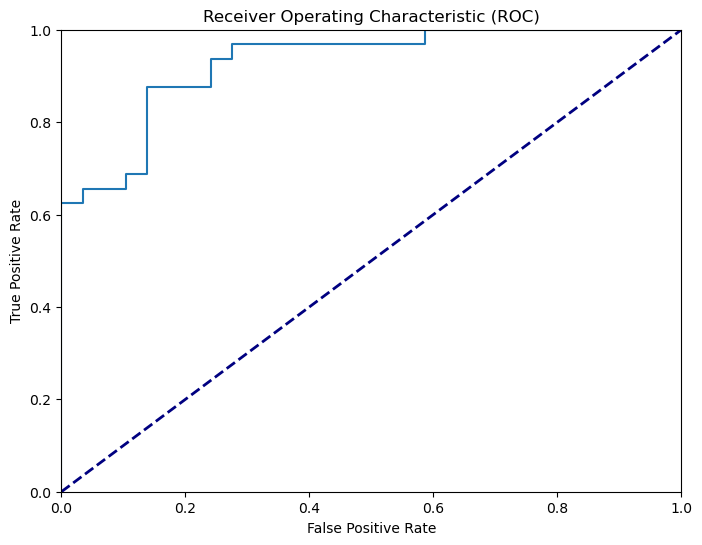

In [11]:
plot_roc_curve(fpr, tpr, roc_auc)